In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import mesa
import mesa_geo as mg

from pyrosm import OSM

from aves.data import eod
from zorzim.model.model import ZorZim
from zorzim.model.demand_model import EODDemandGenerationModel
from zorzim.visualization.server import (
    agent_draw,
    clock_element,
    status_chart,
)

ZORZIM_ROOT = Path("..")

OSM_PATH = ZORZIM_ROOT / "data" / "external" / "OSM"

EOD_PATH = ZORZIM_ROOT / "aves" / "data" / "external" / "EOD_STGO"

PBF_FILENAME = "chile-rm-latest.osm.pbf"

In [3]:
viajes = eod.read_trips(EOD_PATH)
viajes.loc[viajes["ComunaOrigen"] == "Santiago"].loc[viajes["ComunaDestino"] == "Santiago"]

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,...,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo,ModoDifusion,DistEuclidiana,DistManhattan,Imputada,TipoDia,FactorExpansion
419,100562,10056201,1005620102,1,Santiago,Santiago,Centro,Centro,48,15,...,NaN,1.12722,NaN,NaN,Bip!,1994,2231,0,LaboralEstival,1.127220
669,100872,10087201,1008720102,1,Santiago,Santiago,Centro,Centro,15,10,...,NaN,NaN,NaN,0.0,Caminata,1047,1255,0,Laboral,1.482104
951,101220,10122004,1012200402,1,Santiago,Santiago,Centro,Centro,20,15,...,NaN,NaN,NaN,0.0,Bip!,1997,2728,0,Laboral,1.052764
1203,101562,10156203,1015620303,1,Santiago,Santiago,Centro,Centro,7,15,...,NaN,NaN,NaN,0.0,Caminata,550,777,0,Laboral,1.482104
1320,101730,10173002,1017300202,1,Santiago,Santiago,Centro,Centro,15,35,...,NaN,NaN,NaN,0.0,Auto,2507,2537,0,Laboral,1.043074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111138,278821,27882101,2788210107,1,Santiago,Santiago,Centro,Centro,20,48,...,NaN,NaN,NaN,0.0,Caminata,500,551,0,Laboral,1.482104
111684,279550,27955002,2795500204,1,Santiago,Santiago,Centro,Centro,36,34,...,NaN,NaN,NaN,0.0,Auto,1579,2204,0,Laboral,1.482104
111685,279550,27955002,2795500205,1,Santiago,Santiago,Centro,Centro,34,36,...,NaN,NaN,NaN,0.0,Auto,1579,2204,0,Laboral,1.482104
111883,279851,27985103,2798510302,1,Santiago,Santiago,Centro,Centro,29,13,...,NaN,NaN,NaN,0.0,Bip!,3402,4254,0,Laboral,1.052764


In [4]:
try :
    print("Attempting to open PBF file...")
    osm = OSM(str(OSM_PATH / PBF_FILENAME))

except ValueError:
    print("File " + str(OSM_PATH / PBF_FILENAME) + " not found.")

osm = OSM(str(OSM_PATH / PBF_FILENAME))

boundaries = osm.get_boundaries().to_crs("epsg:5361")
santiago = boundaries.loc[boundaries["name"] == "Santiago"]
print(boundaries)

Attempting to open PBF file...
                            name   ref admin_level        boundary         id  \
0                          Renca  None           8  administrative     109577   
1                        Quilpué  None           8  administrative     220384   
2                     Casablanca  None           8  administrative     444604   
3                          Olmué  None           8  administrative     557789   
4                        Mendoza   MZA           4  administrative     711329   
..                           ...   ...         ...             ...        ...   
98       Distrito Cuadro Benegas  None           6  administrative  513878794   
99            Distrito Pareditas  None           6  administrative  516901866   
100  Distrito Campo de los Andes  None           6  administrative  519932239   
101        Distrito Los Chacales  None           6  administrative  522962614   
102         Distrito Los Árboles  None           6  administrative  525992991 

<Axes: >

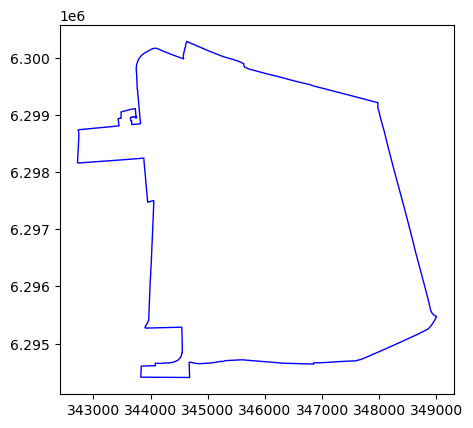

In [5]:
santiago.plot(facecolor="none", edgecolor="blue")

In [2]:
print("PBF file opened successfully!")

model_params = {
    "osm_object": osm,
    "data_crs": "epsg:4326",
    "model_crs": "epsg:5361",
    "num_commuters": mesa.visualization.Slider(
        "Number of Commuters", value=10, min_value=10, max_value=150, step=10
    ),
    "commuter_speed": mesa.visualization.Slider(
        "Commuter Walking Speed (m/s)",
        value=0.5,
        min_value=0.1,
        max_value=1.5,
        step=0.1,
    ),
}

PBF file opened successfully!


NameError: name 'osm' is not defined

In [1]:
print("Creating Map Module...")

dgmodel = EODDemandGenerationModel("Santiago")
#osm_object=OSM('/home/paula/zorzim/data/external/OSM/penalolen.osm.pbf'),
model = ZorZim(osm_object=osm,
data_crs="epsg:4326",
model_crs="epsg:5361",
num_commuters=1,
commuter_speed=1.4,
demand_generation_model=dgmodel)

Creating Map Module...


NameError: name 'EODDemandGenerationModel' is not defined

In [8]:
from zorzim.agent.commuter import Commuter

print("Simulating...")

# Imprimir las posiciones iniciales de los agentes
for agent in model.schedule.agents:
    if isinstance(agent, Commuter):
        print(f"Agente {agent.unique_id} comenzó en {agent.geometry}")

# Simulación de pasos
for i in range(100):
    model.step()
    
    # Recorremos todos los agentes
    for agent in model.schedule.agents:
        if isinstance(agent, Commuter):
            # Verificamos si la posición ha cambiado
            if agent.geometry != agent.last_position:
                print(f"Step {i}: Agente {agent.unique_id} se movió a {agent.geometry}")
                # Actualizamos la última posición registrada
                agent.last_position = agent.geometry


Simulating...
Agente 61612925888916504219355167867479831523 comenzó en POINT (347184.0313 6298086)


In [9]:
print("Simulation done!")

Simulation done!


In [10]:
model.walkway.gt_graph.list_properties()

elem_id         (vertex)  (type: python::object)
x               (vertex)  (type: double)
y               (vertex)  (type: double)
edge_weight     (edge)    (type: double)


In [11]:
dgmodel.get_agent_schedule(0)

OrderedDict([(960.0, ((346539.5313, 6297890.0), (344561.0938, 6297637.5)))])

In [6]:
import random
from shapely.geometry import Point
from zorzim.agent.commuter import Commuter

osm = OSM('/home/paula/zorzim/data/external/OSM/penalolen.osm.pbf')

# Definir el bounding box de Peñalolén (xmin, ymin, xmax, ymax)
xmin, ymin, xmax, ymax = -70.5700, -33.5140, -70.4800, -33.4430

# Función para generar un punto aleatorio dentro del bounding box
def generar_punto_aleatorio(xmin, ymin, xmax, ymax):
    x = random.uniform(xmin, xmax)
    y = random.uniform(ymin, ymax)
    return Point(x, y)

# Crear el modelo con un solo agente
print("PBF file opened successfully!")

model_params = {
    "osm_object": osm,
    "data_crs": "epsg:4326",
    "model_crs": "epsg:5361",
    "num_commuters": 1,  # Solo un agente
    "commuter_speed": 1.4
}

dgmodel = EODDemandGenerationModel("Santiago")
model = ZorZim(
    osm_object=osm,
    data_crs="epsg:4326",
    model_crs="epsg:5361",
    num_commuters=1,  # Solo un agente
    commuter_speed=1.4,
    demand_generation_model=dgmodel
)

print("Simulating...")

# Inicializar la posición del único agente con un punto aleatorio
for agent in model.schedule.agents:
    if isinstance(agent, Commuter):
        # Generar una ubicación inicial aleatoria dentro del bounding box de Peñalolén
        agent.geometry = generar_punto_aleatorio(xmin, ymin, xmax, ymax)
        agent.last_position = agent.geometry  # Inicializar su última posición
        print(f"Agente {agent.unique_id} comenzó en {agent.geometry}")

# Simulación de múltiples pasos para que el agente se mueva varias veces
for i in range(10):
    model.step()
    
    # Recorremos todos los agentes (en este caso, solo hay uno)
    for agent in model.schedule.agents:
        if isinstance(agent, Commuter):
            # Generar un nuevo punto aleatorio en cada paso
            nueva_posicion = generar_punto_aleatorio(xmin, ymin, xmax, ymax)
            if nueva_posicion != agent.last_position:  # Si la nueva posición es distinta
                agent.geometry = nueva_posicion
                print(f"Step {i}: Agente {agent.unique_id} se movió a {agent.geometry}")
                # Actualizar la última posición registrada
                agent.last_position = agent.geometry


PBF file opened successfully!
Simulating...
Agente 118418186329560340173906914411684819659 comenzó en POINT (-70.50167912018554 -33.471322305856994)
Step 0: Agente 118418186329560340173906914411684819659 se movió a POINT (-70.49956785260667 -33.494449088237346)
Step 1: Agente 118418186329560340173906914411684819659 se movió a POINT (-70.50683638341471 -33.46042245277039)
Step 2: Agente 118418186329560340173906914411684819659 se movió a POINT (-70.51015730479318 -33.499723017570076)
Step 3: Agente 118418186329560340173906914411684819659 se movió a POINT (-70.48708221439563 -33.501632204456016)
Step 4: Agente 118418186329560340173906914411684819659 se movió a POINT (-70.55813893866065 -33.46054420928689)
Step 5: Agente 118418186329560340173906914411684819659 se movió a POINT (-70.55257934962528 -33.48549064934338)
Step 6: Agente 118418186329560340173906914411684819659 se movió a POINT (-70.49194514703191 -33.50364375964765)
Step 7: Agente 118418186329560340173906914411684819659 se movió 

In [6]:
import random
from shapely.geometry import Point
from zorzim.agent.commuter import Commuter
import gc  # Importar garbage collection

# Definir el bounding box de Peñalolén (xmin, ymin, xmax, ymax)
xmin, ymin, xmax, ymax = -70.5700, -33.5140, -70.4800, -33.4430

# Función para generar un punto aleatorio dentro del bounding box
def generar_punto_aleatorio(xmin, ymin, xmax, ymax):
    x = random.uniform(xmin, xmax)
    y = random.uniform(ymin, ymax)
    return Point(x, y)

def correr_simulacion():
    # Cargar el archivo OSM
    osm = OSM('/home/paula/zorzim/data/external/OSM/penalolen.osm.pbf')
    
    # Crear el modelo con un solo agente
    print("PBF file opened successfully!")
    
    model_params = {
        "osm_object": osm,
        "data_crs": "epsg:4326",
        "model_crs": "epsg:5361",
        "num_commuters": 1,  # Solo un agente
        "commuter_speed": 1.4
    }

    dgmodel = EODDemandGenerationModel("Santiago")
    model = ZorZim(
        osm_object=osm,
        data_crs="epsg:4326",
        model_crs="epsg:5361",
        num_commuters=1,  # Solo un agente
        commuter_speed=1.4,
        demand_generation_model=dgmodel
    )

    print("Simulating...")

    # Inicializar la posición del único agente con un punto aleatorio
    for agent in model.schedule.agents:
        if isinstance(agent, Commuter):
            # Generar una ubicación inicial aleatoria dentro del bounding box de Peñalolén
            agent.geometry = generar_punto_aleatorio(xmin, ymin, xmax, ymax)
            agent.last_position = agent.geometry  # Inicializar su última posición
            print(f"Agente {agent.unique_id} comenzó en {agent.geometry}")

    # Simulación de múltiples pasos para que el agente se mueva varias veces
    for i in range(10):
        model.step()

        # Recorremos todos los agentes (en este caso, solo hay uno)
        for agent in model.schedule.agents:
            if isinstance(agent, Commuter):
                # Generar un nuevo punto aleatorio en cada paso
                nueva_posicion = generar_punto_aleatorio(xmin, ymin, xmax, ymax)
                if nueva_posicion != agent.last_position:  # Si la nueva posición es distinta
                    agent.geometry = nueva_posicion
                    print(f"Step {i}: Agente {agent.unique_id} se movió a {agent.geometry}")
                    # Actualizar la última posición registrada
                    agent.last_position = agent.geometry
        
        # Forzar garbage collection para liberar memoria no usada
        gc.collect()

# Monitorear el uso de memoria durante la simulación
mem_usage = memory_usage(correr_simulacion)
print(f"Uso de memoria durante la simulación: {mem_usage}")


PBF file opened successfully!
Simulating...
Agente 313320134126714225831254845231188903864 comenzó en POINT (-70.5040728751234 -33.474576425108765)
Step 0: Agente 313320134126714225831254845231188903864 se movió a POINT (-70.51326383636233 -33.493536238235514)
Step 1: Agente 313320134126714225831254845231188903864 se movió a POINT (-70.52137623872864 -33.453644992509815)
Step 2: Agente 313320134126714225831254845231188903864 se movió a POINT (-70.49181795985054 -33.49370159995762)
Step 3: Agente 313320134126714225831254845231188903864 se movió a POINT (-70.5561979077138 -33.47883884295266)
Step 4: Agente 313320134126714225831254845231188903864 se movió a POINT (-70.55971571707872 -33.47983388002073)
Step 5: Agente 313320134126714225831254845231188903864 se movió a POINT (-70.50527723400094 -33.47174285068102)
Step 6: Agente 313320134126714225831254845231188903864 se movió a POINT (-70.51144218357422 -33.498973277746934)
Step 7: Agente 313320134126714225831254845231188903864 se movió a 